# GROUP2
---



In [ ]:
import pandas as p
import os
import numpy as n
import matplotlib.pyplot as m #import math as m
import scipy.stats as st

import seaborn as sn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = '/content/drive/MyDrive/VNU-IFI/TP-Fouilles de donnees/dataset.csv'

vin = p.read_csv(data)
vin

,type de vin,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Vin-rouge,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,Vin-rouge,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,Vin-rouge,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,Vin-rouge,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,Vin-rouge,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,Vin-blanc,9.1,0.59,0.38,1.6,0.066,34.0,182.0,0.9968,3.23,0.38,8.5,3
543,Vin-blanc,6.3,0.33,0.27,1.2,0.046,34.0,175.0,0.9934,3.37,0.54,9.4,6
544,Vin-blanc,8.3,0.39,0.70,10.6,0.045,33.0,169.0,0.9976,3.09,0.57,9.4,5
545,Vin-blanc,7.2,0.19,0.46,3.8,0.041,82.0,187.0,0.9932,3.19,0.60,11.2,7


# New Section

In [ ]:
# CHOIX DE LA VARIABLE
# Nous avons choisi la qualite du vin
quality = vin['quality']
quality

0      5
1      5
2      5
3      6
4      5
      ..
542    3
543    6
544    5
545    7
546    6
Name: quality, Length: 547, dtype: int64

In [ ]:
# VALEUR MINIMUM DE LA QUALITE
quality.min()

3

In [ ]:
# VALEUR MAXIMUM DE LA QUALITE
quality.max()

8

In [ ]:
# CALCUL DE LA MOYENNE DE LA QUALITE
quality.mean()

5.552102376599635

In [ ]:
# CALCUL DU MEDIANE
quality.median()

5.0

In [ ]:
# CALCUL DE L'EQUART TYPE
quality.std()

0.8400081569756036

In [ ]:
# CALCUL DE LA VARIANCE
quality.var()

0.7056137037855502

In [ ]:
# CALCUL A 2 VARIABLES

# CORRELATION
co = vin.corr()
cor = co['quality'][:-1]

<ipython-input-17-d83a810dc3be>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co = vin.corr()


In [ ]:
cor.min()

-0.36661793469750703

In [ ]:
cor.max()

0.38107171918171406

In [ ]:
# De ce constat, nous deduisons que la variable 'alcohol' influence le plus sur la qualite du vin avec un coefficient de 0,38 qui est le plus eleve
corel = quality.corr(vin['alcohol'])
corel

0.38107171918171445

Text(0.5, 1.0, "Relation entre la quantite d'alcool et la qualité de vin")

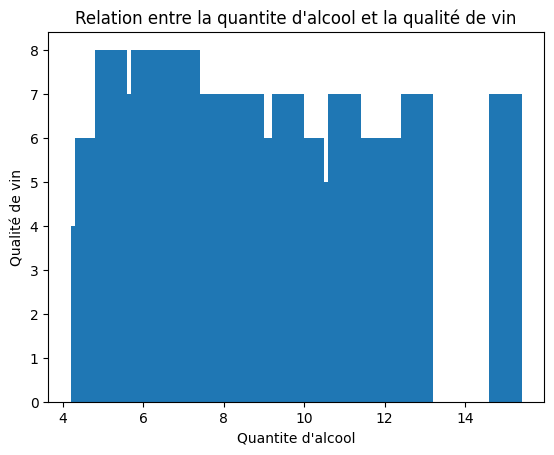

In [ ]:
# GRAPHIQUE REPRESENTATIF DE LA QUALITE DU VIN ET LA QUANTITE D'ALCOOL
gr = m.bar(vin['fixed acidity'],quality)

m.xlabel('Quantite d\'alcool')
m.ylabel('Qualité de vin')
m.title('Relation entre la quantite d\'alcool et la qualité de vin')

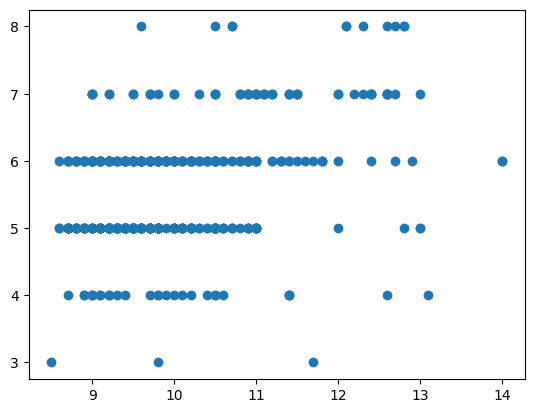

In [ ]:
gr = m.scatter(vin['alcohol'],quality)

In [ ]:
t_stat, p_value = st.ttest_ind(vin['alcohol'],quality)

print(f"Statistique: {t_stat}, Probabilite : {p_value}")

Statistique: 79.24542913291681, Probabilite : 0.0


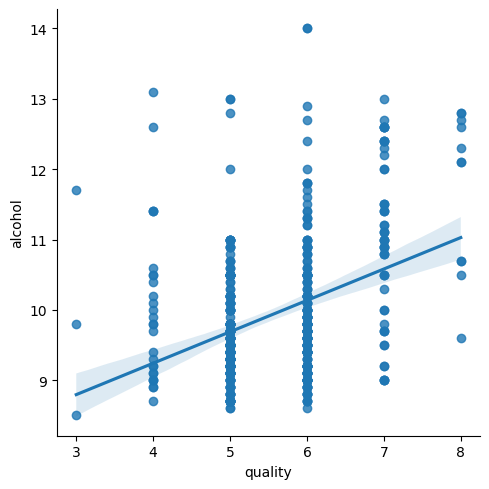

In [ ]:
sn.lmplot(x='quality', y='alcohol', data=vin)

In [ ]:
# Analyse Factorielle
## Installer "PCA"
## Nous avons choisit l'ACP car nous avons un contenue continue et numerique
from sklearn.decomposition import PCA

In [ ]:
import numpy as np

variables = vin[['fixed acidity', 'volatile acidity', 'citric acid',
             'residual sugar', 'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
             ]]
variables = n.array(variables)

pca = PCA(n_components=2)
pca.fit(variables)

transformed = pca.transform(variables)
transformed_arr = np.array(transformed)

print(transformed)

[[-76.21490614  -1.6432696 ]
 [-40.8223144   -7.19596552]
 [-55.84802582  -0.6641577 ]
 ...
 [ 60.35596241   9.43031089]
 [ 89.29709666 -33.21337097]
 [ 45.80900611 -27.18912574]]


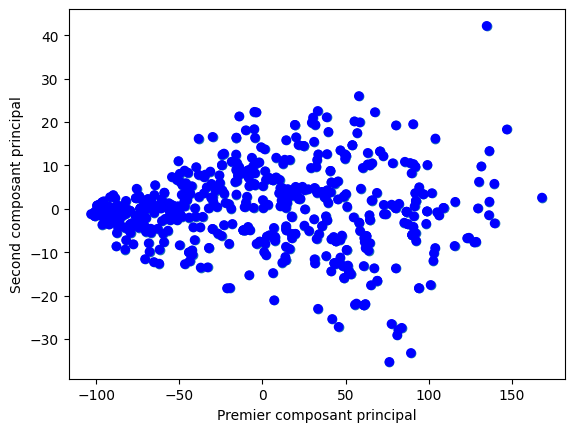

In [ ]:
# Representation graphique
m.scatter(transformed[:,0], transformed[:,1])
m.xlabel("Premier composant principal")
m.ylabel("Second composant principal")

# colors = ['r' if x > 0 else 'y' for x in variables[:, 0]]
colours = ['b' if y > 0 else 'r' for y in variables[:, 1]
          ]


m.scatter(transformed[:,0], transformed[:,1], c=colours)

m.show()


In [ ]:
## Valeurs propres
pca.explained_variance_

array([3939.13367275,   87.80639875])

In [ ]:
## Pourcentage de variance expliquer
pourcentage_variance = pca.explained_variance_ratio_
pourcentage_variance

array([0.97426645, 0.02171717])

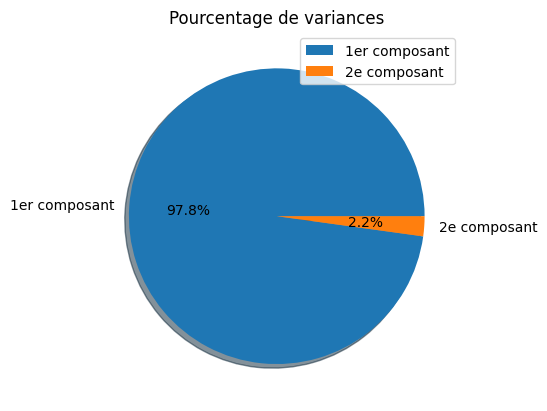

In [ ]:
lab = ['1er composant','2e composant']

# Récupérer les colonnes dans des listes
labels = lab
sizes =  pourcentage_variance

# Afficher le diagramme
m.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)

# Personnaliser l'apparence
m.title('Pourcentage de variances')
m.legend(labels, loc='best')

# Afficher le diagramme
m.show()


# INTERPRETATION DU POURCENTAGE DE VARIANCE
Dans notre cas, ayant obtenu un pourcentage de variance de 97% pour la première composante principale et 0.02% pour la deuxième composante principale, cela signifie que la première composante principale capture une grande partie de la variance dans nos données, tandis que la deuxième composante principale capture une petite quantité de variance supplémentaire.

In [ ]:
## Coeffecient de chaque variable
comp = pca.components_
comp

array([[-5.85251165e-03, -1.71530203e-03,  9.80068718e-04,
         4.68862989e-02, -2.13283112e-04,  2.41010123e-01,
         9.69365519e-01, -1.14310724e-06, -1.04983542e-03,
        -8.03954807e-04, -2.51758014e-03],
       [ 1.89622258e-03,  2.20835889e-03, -8.32595240e-04,
        -5.85596413e-02, -4.85961821e-04, -9.68084907e-01,
         2.43560204e-01, -2.01834215e-05,  4.37069225e-04,
         1.91090391e-03,  6.89665296e-03]])

In [ ]:
coef_corr = n.corrcoef(variables, rowvar=False)
coef_corr

array([[ 1.        ,  0.12825895,  0.26789034, -0.14850518,  0.23284989,
        -0.2845461 , -0.3207559 ,  0.42354067, -0.28945588,  0.34138037,
        -0.14231597],
       [ 0.12825895,  1.        , -0.52878328, -0.36437632,  0.298849  ,
        -0.51740982, -0.53701509,  0.23469867,  0.3295069 ,  0.25349073,
        -0.07695315],
       [ 0.26789034, -0.52878328,  1.        ,  0.28073091,  0.06677019,
         0.33858509,  0.36573586,  0.0582082 , -0.45000026,  0.06850487,
        -0.01269287],
       [-0.14850518, -0.36437632,  0.28073091,  1.        , -0.2300466 ,
         0.57500365,  0.60881101,  0.47117681, -0.39494995, -0.24605899,
        -0.35437913],
       [ 0.23284989,  0.298849  ,  0.06677019, -0.2300466 ,  1.        ,
        -0.16723198, -0.25006215,  0.25637134, -0.12370689,  0.59316077,
        -0.20057174],
       [-0.2845461 , -0.51740982,  0.33858509,  0.57500365, -0.16723198,
         1.        ,  0.83765749,  0.0057018 , -0.35494295, -0.24568516,
        -0.166

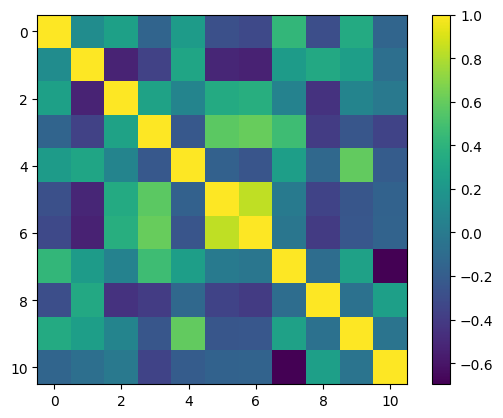

In [ ]:
# Representation graphique des valeurs du coefficient de covariance
m.imshow(coef_corr, cmap='viridis')
m.colorbar()
m.show()

In [ ]:
# Interpretation

- Les valeurs diagonales de la matrice (coefficients de corrélation de 1) représentent la corrélation parfaite entre une variable et elle-même.
- Les coefficients de corrélation entre -0.1 et 0.1 sont considérés comme une corrélation très faible ou négligeable.
- Les coefficients de corrélation positifs proches de 1 indiquent une corrélation positive forte entre les variables correspondantes. Par exemple, la première variable est fortement positivement corrélée avec les neuvième (0.42354067) et dixième (0.34138037) variables.
- Les coefficients de corrélation négatifs proches de -1 indiquent une corrélation négative forte entre les variables correspondantes. Par exemple, la quatrième variable est fortement négativement corrélée avec la huitième variable (-0.69683678).
- Les coefficients de corrélation proches de zéro indiquent une faible corrélation ou l'absence de corrélation linéaire entre les variables correspondantes. Par exemple, les deuxième et troisième variables ont une corrélation faible (-0.52878328).

Il est important de noter que cette interprétation se base uniquement sur les valeurs de corrélation et ne prend pas en compte d'autres facteurs tels que la significativité statistique ou la causalité entre les variables.


In [ ]:
# Classification Avec K-means
## 1ere Methode

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = vin[['fixed acidity', 'volatile acidity', 'citric acid',
             'residual sugar', 'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Charger le jeu de données
# Assurez-vous d'adapter le chemin du fichier CSV à votre structure de répertoire
wine_data = pd.read_csv(r'/content/drive/MyDrive/VNU-IFI/TP-Fouilles de donnees/dataset.csv')

# Sélectionner les colonnes pertinentes pour la modélisation
X = vin[['fixed acidity', 'volatile acidity', 'citric acid',
             'residual sugar', 'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Essayer différentes valeurs de k
best_k = 1
best_inertia = float('inf')

for k in range(1, 26):
	kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
	kmeans.fit(X_scaled)
	labels = kmeans.predict(X_scaled)
	inertia = kmeans.inertia_

	# Comparer l'inertie avec le meilleur trouvé jusqu'à présent
	if inertia < best_inertia:
    	best_inertia = inertia
    	best_k = k
    	best_labels = labels

# Afficher le résultat pour le meilleur k
print(f"Meilleur nombre de clusters (k) : {best_k}")
print(f"Inertie pour le meilleur k : {best_inertia}")

# Afficher le diagramme en nuage de points des clusters pour le meilleur k
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=best_labels)
plt.xlabel('Premier cluster')
plt.ylabel('Deuxième cluster')
plt.title(f'Diagramme en nuage de points des clusters pour k={best_k}')
plt.show()


TabError: ignored

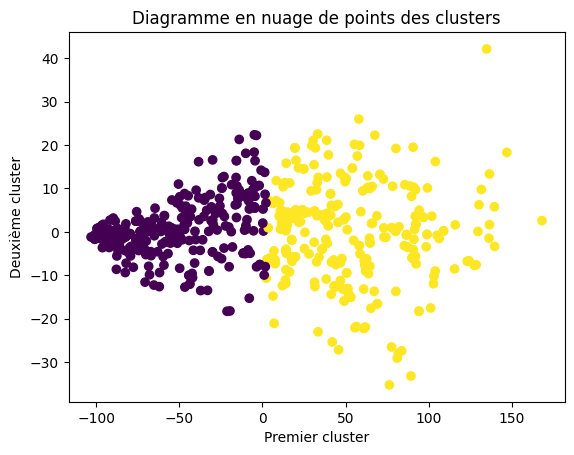

In [ ]:
m.scatter(transformed[:, 0], transformed[:, 1], c=labels)
m.xlabel('Premier cluster')
m.ylabel('Deuxième cluster')
m.title('Diagramme en nuage de points des clusters')
m.show()

In [ ]:
# Interpretation

*Le* résultat de la classification avec l'algorithme k-means montre deux groupes distincts dans votre jeu de données de qualité de vin. Les échantillons sont étiquetés comme appartenant à la classe 0 ou à la classe 1.
Cela suggère qu'il existe une différence significative entre les échantillons de vin dans ces deux classes. Il est possible que les échantillons de la classe 0 représentent des vins de qualité inférieure, tandis que ceux de la classe 1 représentent des vins de qualité supérieure.
La classification basée sur les caractéristiques initiales des échantillons de vin a permis de les regrouper en fonction de leurs similitudes. L'algorithme k-means a cherché à minimiser la distance entre les échantillons à l'intérieur de chaque groupe (intra-cluster) et à maximiser la distance entre les groupes (inter-cluster).

In [ ]:
# Classification avec une methode d'analyse factorielle

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
from re import X
# Séparer les fonctionnalités (X) des labels (y)
X_train = vin.iloc[:, 1:-1]  # Sélectionner toutes les colonnes sauf la dernière et la premiere
y_train = vin.iloc[:, -1]   # Sélectionner la dernière colonne

# Créer et entraîner le modèle AFD
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Données de test
X_test = [[7.4,	0.70,	0.00,	1.9,	0.076,	11.0,	34.0,	0.9978,	3.51,	0.56,	9.4]	]

# Prédire les classes des données de test
y_pred = model.predict(X_test)

print(y_pred)

[5]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [ ]:
# classification HAC
#  2eme methode

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Créer le modèle HAC
model = AgglomerativeClustering(n_clusters=2)

# Effectuer la classification HAC
labels_hac = model.fit_predict(variables)

print(labels_hac)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 1 

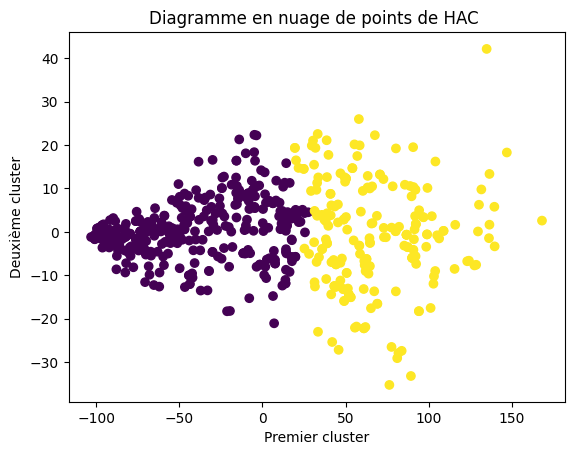

In [ ]:
m.scatter(transformed[:, 0], transformed[:, 1], c=labels_hac)
m.xlabel('Premier cluster')
m.ylabel('Deuxième cluster')
m.title('Diagramme en nuage de points de HAC ')
m.show()

# Interpretation

La liste est composée de 0 et de 1. Chaque valeur correspond à l'appartenance d'un échantillon (ou d'une instance) à un cluster particulier.
La valeur 0 indique que l'échantillon n'appartient pas à un cluster spécifique ou qu'il a été attribué à un cluster "non significatif".
La valeur 1 indique que l'échantillon appartient à un cluster spécifique.
Par exemple, le premier échantillon de votre dataset a une valeur de 0, ce qui signifie qu'il n'a pas été attribué à un cluster particulier. Les échantillons 15, 16, 61, 64, etc. ont une valeur de 1, ce qui signifie qu'ils appartiennent à un cluster spécifique.


## Préparation des données

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
data = '/content/drive/MyDrive/VNU-IFI/TP-Fouilles de donnees/dataset.csv'
vine = pd.read_csv(data)

In [ ]:
# Séparer les caractéristiques et les étiquettes
caracteristique = vine.drop(['quality','type de vin'], axis=1)
cible = vine['quality']

In [ ]:
# Afficher les premières lignes des caractéristiques (X) et de la variable cible (y)
print("Caractéristiques (X):")
print(caracteristique.head())

print("\nVariable Cible (y):")
print(np.array(cible[0:110]))

Caractéristiques (X):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  

## Prétraitement des données

In [ ]:
# Affichage des statistiques de notre jeu de donnees
print(vine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count     547.000000        547.000000   547.000000      547.000000   
mean        7.284644          0.415695     0.292029        5.017185   
std         1.142431          0.198870     0.167228        4.784550   
min         4.600000          0.115000     0.000000        0.800000   
25%         6.700000          0.252500     0.180000        1.800000   
50%         7.200000          0.370000     0.300000        2.300000   
75%         7.800000          0.560000     0.400000        7.450000   
max        15.000000          1.330000     1.000000       22.000000   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  547.000000           547.000000            547.000000  547.000000   
mean     0.071155            27.808044            108.293419    0.995649   
std      0.054127            17.639883             60.882726    0.002415   
min      0.020000             3.000000              8.00

In [ ]:
# Verification de valeurs manquantes
print(vine.isnull().sum())

type de vin             0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Box plots pour chaque variable
plt.figure(figsize=(10, 8))
sns.boxplot(vine=vine)
plt.xticks(rotation=45)
plt.show()

NameError: ignored

### INTERPRETATION

Cela signifie que toutes les colonnes sont complètes et ne contiennent aucune valeur manquante et que notre jeu de données est complet et qu'il ne nécessite pas de passer par une etape de pretraitement.

## Choix d’un ensemble d’entraînement et d’un ensemble de validation dans les données

In [ ]:
# Diviser les données en ensembles d'entraînement et de validation
X_train, X_test,y_train, y_test = train_test_split(caracteristique, cible, test_size=0.2, random_state=42)

Cette etape consiste a diviser nos données en 2 ensembles distincts pour l'entraînement et l'évaluation, ce qui nous permet de mesurer la performance de notre modèle sur des données non vues. Voici comment nous pourrions aborder cette étape :

    Ensemble d'entraînement : C'est l'ensemble de données sur lequel nous allons entraîner notre modèle. Il contient 80% de notre jeu de donnees.

    Ensemble de validation : C'est l'ensemble de données que nous utilisons pour évaluer la performance de notre modèle après l'entraînement. Il contient donc les 20% restants de notre jeu de donnees total.

### Representation graphique des x_train, y_train

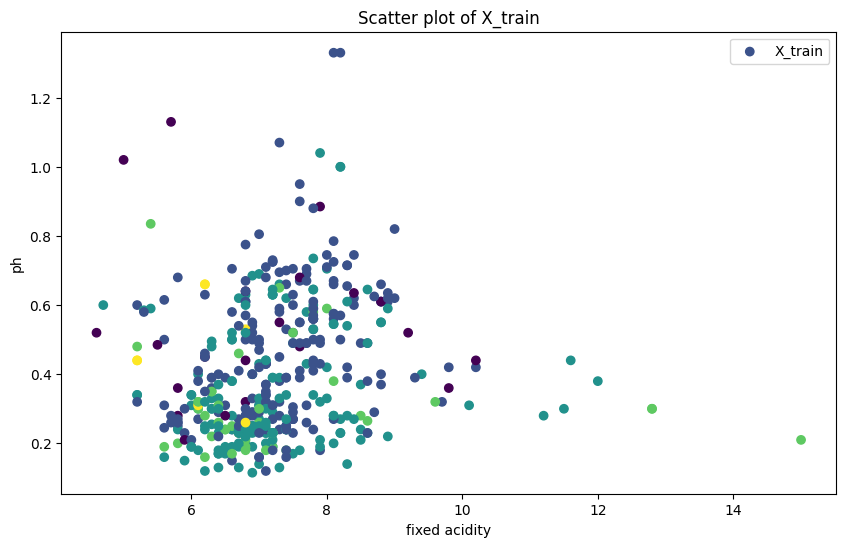

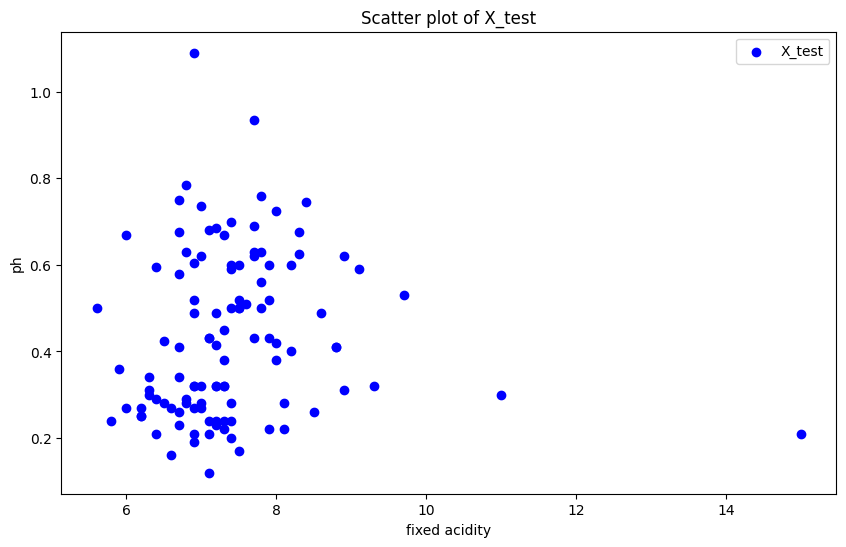

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
X_test_np = np.array(X_test)
y_test_np = np.array(y_train)

# Affichage des données X_train
plt.figure(figsize=(10, 6))  # Facultatif : définir la taille de la figure
plt.scatter(X_train_np[:, 0], X_train_np[:, 1], c=y_train_np, label='X_train')
plt.xlabel("fixed acidity")
plt.ylabel("ph")
plt.title("Scatter plot of X_train")
plt.legend()
plt.show()

# Affichage des données X_test
plt.figure(figsize=(10, 6))  # Facultatif : définir la taille de la figure
plt.scatter(X_test_np[:, 0], X_test_np[:, 1], c="blue", label='X_test')
plt.xlabel("fixed acidity")
plt.ylabel("ph")
plt.title("Scatter plot of X_test")
plt.legend()
plt.show()



## RANDOM FOREST

In [ ]:
# Définir les hyperparamètres à rechercher
param_grid = {
    'n_estimators': [100, 200, 300, 400,500,1000],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [None,2, 5, 10]
}

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)

# Effectuer la recherche d'hyperparamètres sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres:", best_params)

KeyboardInterrupt: ignored

In [ ]:
# Utiliser le meilleur modèle pour faire des prédictions sur les données de test
best_model = grid_search.best_estimator_
random_forest_pred = best_model.predict(X_test)

# Évaluer les performances du modèle
accuracy_random_forest = accuracy_score(y_test, random_forest_pred)
best_model
print("Accuracy:", accuracy_random_forest)


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
confusion = confusion_matrix(y_test, random_forest_pred)
confusion

In [ ]:
# Representation graphique de la matrice de confusion
confusion_matrix0 = np.array(confusion)

# Étiquettes des classes
labels = ['0', '1', '2', '3', '4', '5']

# Création du graphique de la matrice de confusion
plt.imshow(confusion_matrix0, cmap='Blues')

# Ajout des annotations dans les cellules
for i in range(confusion_matrix0.shape[0]):
    for j in range(confusion_matrix0.shape[1]):
        plt.text(j, i, str(confusion_matrix0[i, j]), ha='center', va='center',
                 color='white' if confusion_matrix0[i, j] > confusion_matrix0.max() / 2 else 'black')

# Personnalisation des axes
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')

# Titre du graphique
plt.title('Matrice de confusion')

# Affichage du graphique
plt.show()

### Interpretation

En analysant notre matrice de confusion, nous pouvons tirer les observations suivantes :

La première ligne de la matrice indique que pour les vraies valeurs de classe 0, le modèle a prédit correctement 0 cas, a prédit la classe 2 pour 2 cas et la classe 4 pour 1 cas.

La deuxième ligne indique que pour les vraies valeurs de classe 1, le modèle n'a fait aucune prédiction correcte et a prédit la classe 2 pour 5 cas et la classe 3 pour 2 cas.

La troisième ligne indique que pour les vraies valeurs de classe 2, le modèle a prédit correctement 43 cas, a prédit la classe 3 pour 10 cas et n'a fait aucune prédiction pour les autres classes.

Et ainsi de suite pour les autres lignes.

### Tracer les graphiques

In [ ]:
import matplotlib.pyplot as plt
# Tracer les graphiques
plt.figure(figsize=(15, 5))

# Graphique pour Random Forest
plt.figure(figsize=(6, 6))  # Facultatif : définir la taille de la figure
plt.scatter(X_test_np[:, 0], X_test_np[:, 1], c=random_forest_pred)
plt.title("Predicion Random Forest")
plt.xlabel(" Variable 1")
plt.ylabel("Variable 2")

## ARBRE DE DECISION

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Définir les hyperparamètres à rechercher
param_grid_arbre_decision = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Créer l'objet GridSearchCV
grid_search_arbre_decision = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_arbre_decision, cv=5)

# Effectuer la recherche d'hyperparamètres sur les données d'entraînement
grid_search_arbre_decision.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres
best_params = grid_search_arbre_decision.best_params_
print("Meilleurs hyperparamètres:", best_params)

# Création du modèle d'Arbre de décision avec les meilleurs hyperparamètres
best_model_decision_tree = DecisionTreeClassifier(random_state=42, **best_params)

# Entraînement du modèle avec les meilleurs hyperparamètres
best_model_decision_tree.fit(X_train, y_train)

# Prédictions sur les données de test avec le meilleur modèle
y_pred_best_decision_tree = best_model_decision_tree.predict(X_test)
y_pred_best_decision_tree

# Évaluer les performances du modèle
accuracy_arbre_Decision = accuracy_score(y_test, y_pred_best_decision_tree)
print("Accuracy:", accuracy_arbre_Decision)

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
confusion1 = confusion_matrix(y_test, y_pred_best_decision_tree)
confusion1

In [ ]:
# Representation graphique de la matrice de confusion
confusion_matrix = np.array(confusion1)

# Étiquettes des classes
labels = ['0', '1', '2', '3', '4', '5']

# Création du graphique de la matrice de confusion
plt.imshow(confusion_matrix, cmap='Blues')

# Ajout des annotations dans les cellules
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center',
                 color='white' if confusion_matrix[i, j] > confusion_matrix.max() / 2 else 'black')

# Personnalisation des axes
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')

# Titre du graphique
plt.title('Matrice de confusion')

# Affichage du graphique
plt.show()

### Interpretation

En analysant de nouveau, la matrice de confusion :

La première ligne indique que pour les vraies valeurs de classe 0, le modèle a prédit correctement 0 cas, a prédit la classe 2 pour 2 cas, la classe 3 pour 1 cas, et n'a fait aucune prédiction pour les autres classes.

La deuxième ligne indique que pour les vraies valeurs de classe 1, le modèle a prédit correctement 0 cas, a prédit la classe 2 pour 6 cas, la classe 3 pour 1 cas, et n'a fait aucune prédiction pour les autres classes.

La troisième ligne indique que pour les vraies valeurs de classe 2, le modèle a prédit correctement 41 cas, a prédit la classe 1 pour 2 cas, la classe 3 pour 8 cas, la classe 4 pour 2 cas, et n'a fait aucune prédiction pour les autres classes.

La quatrième ligne indique que pour les vraies valeurs de classe 3, le modèle a prédit correctement 16 cas, a prédit la classe 1 pour 2 cas, la classe 2 pour 13 cas, la classe 4 pour 1 cas, et n'a fait aucune prédiction pour les autres classes.

La cinquième ligne indique que pour les vraies valeurs de classe 4, le modèle a prédit correctement 6 cas, a prédit la classe 3 pour 6 cas, la classe 5 pour 1 cas, et n'a fait aucune prédiction pour les autres classes.

La dernière ligne indique que pour les vraies valeurs de classe 5, le modèle a prédit correctement 1 cas, a prédit la classe 4 pour 1 cas, et n'a fait aucune prédiction pour les autres classes.

In [ ]:
## COMPARAISON

En comparant les deux méthodes, voici ce que nous pouvons observer et retenir:

La forêt aléatoire présente des valeurs plus équilibrées dans sa matrice de confusion, avec moins de prédictions incorrectes pour certaines classes par rapport à l'arbre de décision. Cela suggère que la forêt aléatoire est plus performante en termes de discrimination entre les différentes classes.
En plus,La forêt aléatoire a une précision plus élevée (0.627) par rapport à l'arbre de décision (0.582). Cela indique que la forêt aléatoire est plus précise dans ses prédictions.

Nous tirons comme conclusion que dans le cas de notre jeu de donnees parlant sur la qualite de vin, la methode forêt aléatoire semble etre meilleur que l'arbre de décision en termes de precision.
En effet, elle offre une meilleure précision globale et une meilleure capacité à distinguer les différentes classes.

## SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Charger votre ensemble de données sur la qualité du vin (assurez-vous d'ajuster le chemin du fichier CSV)
data = p.read_csv("/content/drive/MyDrive/VNU-IFI/TP-Fouilles de donnees/dataset.csv")

# Séparer les caractéristiques (X) de la cible (y)
X = data.drop(['quality','type de vin'], axis=1)
y = data['quality']
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Définir la grille des hyperparamètres à rechercher pour SVM , 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf', 'poly']
param_grid_svm = {'C': [0.1, 1, 10, 100]}

# Initialiser le modèle SVM
svm_model = SVC()

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres pour SVM
best_params_svm = grid_search_svm.best_params_
print(f"Meilleurs hyperparamètres pour SVM : {best_params_svm}")

# Faire des prédictions sur les données de test avec les meilleurs hyperparamètres
y_pred_svm = grid_search_svm.predict(X_test)

# Évaluer les performances du modèle SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Exactitude du modèle SVM : {accuracy_svm}")


Meilleurs hyperparamètres pour SVM : {'C': 100}
Exactitude du modèle SVM : 0.4909090909090909


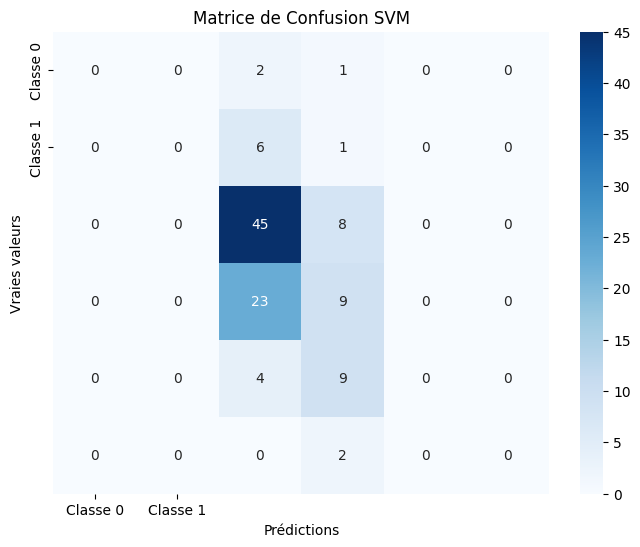

Précision SVM : 0.4909090909090909
[[ 0  0  2  1  0  0]
 [ 0  0  6  1  0  0]
 [ 0  0 45  8  0  0]
 [ 0  0 23  9  0  0]
 [ 0  0  4  9  0  0]
 [ 0  0  0  2  0  0]]


In [ ]:
# Matrice de confusion
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Affichage graphique de la matrice de confusion pour SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de Confusion SVM')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()

# Précision du modèle
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Précision SVM :", accuracy_svm)
print(conf_matrix_svm)

## KNNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir la grille des hyperparamètres à rechercher (k de 1 à 20)
param_grid = {'n_neighbors': list(range(1, 21))}

# Initialiser le modèle KNN
knn_model = KNeighborsClassifier()

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
best_k = grid_search.best_params_['n_neighbors']
print(f"Meilleur hyperparamètre pour KNN (k) : {best_k}")

# Faire des prédictions sur les données de test avec les meilleurs hyperparamètres
y_pred_knn = grid_search.predict(X_test)

# Évaluer les performances du modèle KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Exactitude du modèle KNN : {accuracy_knn}")

Meilleur hyperparamètre pour KNN (k) : 1
Exactitude du modèle KNN : 0.5818181818181818


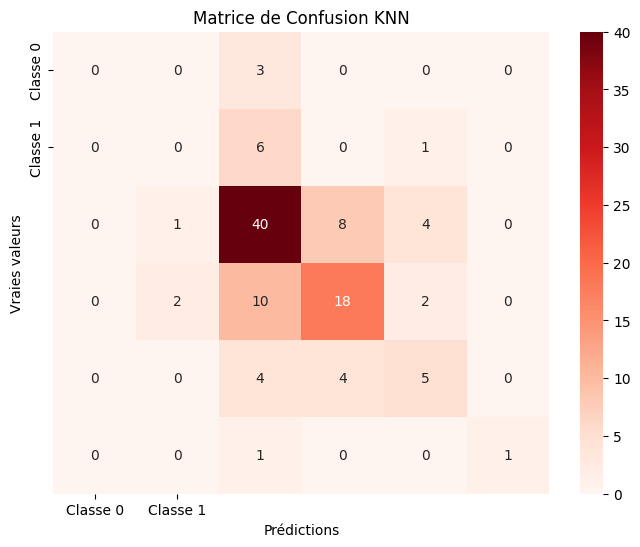

Précision KNN : 0.5818181818181818
[[ 0  0  3  0  0  0]
 [ 0  0  6  0  1  0]
 [ 0  1 40  8  4  0]
 [ 0  2 10 18  2  0]
 [ 0  0  4  4  5  0]
 [ 0  0  1  0  0  1]]


In [ ]:
# Matrice de confusion
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Affichage graphique de la matrice de confusion pour KNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Reds', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de Confusion KNN')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()

# Précision du modèle
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Précision KNN :", accuracy_knn)
print(conf_matrix_knn)

## RESEAU DE NEURONES

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Définir la grille des hyperparamètres à rechercher
param_grid_nn = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], 'activation': ['relu', 'tanh', 'logistic']}

# Initialiser le modèle MLP
nn_model = MLPClassifier(max_iter=500, random_state=42)

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search_nn = GridSearchCV(nn_model, param_grid_nn, cv=5, scoring='accuracy')
grid_search_nn.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres pour le réseau de neurones:", grid_search_nn.best_params_)

# Faire des prédictions sur les données de test avec les meilleurs hyperparamètres
y_pred_nn = grid_search_nn.predict(X_test)

# Évaluer les performances du modèle de réseau de neurones
report_nn = classification_report(y_test, y_pred_nn)
print(f"Classification Report pour le réseau de neurones:\n{report_nn}")




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Meilleurs hyperparamètres pour le réseau de neurones: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50)}
Classification Report pour le réseau de neurones:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         7
           5       0.65      0.75      0.70        53
           6       0.46      0.56      0.51        32
           7       0.88      0.54      0.67        13
           8       0.00      0.00      0.00         2

    accuracy                           0.59       110
   macro avg       0.33      0.31      0.31       110
weighted avg       0.55      0.59      0.56       110



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


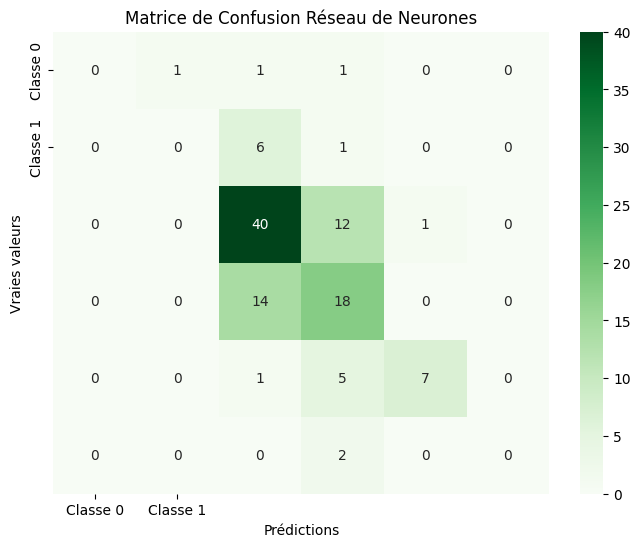

Précision Réseau de Neurones : 0.5909090909090909
[[ 0  1  1  1  0  0]
 [ 0  0  6  1  0  0]
 [ 0  0 40 12  1  0]
 [ 0  0 14 18  0  0]
 [ 0  0  1  5  7  0]
 [ 0  0  0  2  0  0]]


In [ ]:
# Matrice de confusion
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)

# Affichage graphique de la matrice de confusion pour le réseau de neurones
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Greens', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de Confusion Réseau de Neurones')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()

# Précision du modèle
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Précision Réseau de Neurones :", accuracy_nn)
print(conf_matrix_nn)